# Problem Statement


Financial markets are highly sensitive to public sentiment, which can be influenced by economic conditions, market trends, and unexpected events. Traditional sentiment analysis methods often fail to capture the dynamic nature of public opinion, making it challenging for investors to make informed decisions. Social media platforms like Twitter offer a vast and real-time source of public sentiment, presenting an opportunity to enhance sentiment analysis through advanced data-driven approaches.

In the technology industry, understanding customer sentiment is vital for companies like Google and Apple. With millions of users sharing their opinions online, manually analyzing customer feedback is impractical and prone to bias. Machine Learning provides a scalable and efficient way to automate sentiment analysis, enabling businesses to extract meaningful insights from large volumes of data.

This project aims to develop and deploy Machine Learning models to analyze sentiment from customer feedback on Google and Apple products. By leveraging social media data, we seek to provide actionable insights for investors, traders, and businesses, allowing them to better understand public perception and make data-driven decisions.



# Data Understanding

The dataset, sourced from CrowdFlower via [data.world](https://data.world/crowdflower/brands-and-product-emotions), comprises over 9,000 tweets with sentiment ratings labeled as positive, negative, or neutral by human raters.

The tweets were posted during the South by Southwest conference, primarily discussing Google and Apple products. The crowd was asked if the tweet expressed positive, negative, or no emotion towards a brand and/or product. If some emotion was expressed, they were also asked to specify which brand or product was the target of that emotion. The data was compiled in 2013 by Kent Cavender-Bares.

Tweets, being succinct and emotionally charged, serve as effective indicators of consumer sentiment. South by Southwest serves as a platform for showcasing the latest technology, enabling consumers to compare products from major tech companies directly and potentially mitigating biases to some extent.

The target variable was engineered into two classes: tweets with positive sentiment and tweets without positive sentiment, encompassing neutral, negative, and indistinguishable sentiments. The focus is solely on whether the tweet is positive, as positive emotion drives sales, which can be translated into return on investment.

In [35]:
# importing the libraries used in this model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# For NLP
import nltk
from nltk.corpus import RegexpTokenizer, stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
#For Modelling
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,f1_score, roc_auc_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer

In [60]:
#loading the data
data = pd.read_csv(r'C:\Users\karay\OneDrive\Documents\Phase 4 Project\phase-4-project\judge-1377884607_tweet_product_company.csv',encoding='latin1')
data

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [3]:
data.head(10)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


## Data Cleaning

In [ ]:
# checking for null values
data.isna().sum()


tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [6]:
#Rename the column 'tweet_text' to 'text'
data = data.rename(columns={'tweet_text': 'text'})
#Rename column 'emotion_in _tweet_is_directed_at'to 'target'
data = data.rename(columns={'emotion_in_tweet_is_directed_at': 'target'})
#Rename the column is_there_an_emotion_directed_at_a_brand_or_product' to 'emotion'
data = data.rename(columns={'is_there_an_emotion_directed_at_a_brand_or_product': 'emotion'})

data.head(10)

,text,target,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion


In [7]:
#To get to show the number and labels of classes in the data
data['target'].value_counts()

target
iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: count, dtype: int64

In [8]:
#To get to show the number and labels of classes in the data
data['emotion'].value_counts()

emotion
No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64

In [9]:
# Standardize any target brand with the keyword using .replace()
data['target'] = data['target'].str.replace("['Google','Other Google product or service']", "Google", case=False, regex=False)
data['target'] = data['target'].str.replace("iPad or iPhone App", "Apple", case=False, regex=False)
data['target'] = data['target'].str.replace('Android App', "Android", case=False, regex=False)
data['target'] = data['target'].str.replace("iPad", "Apple", case=False, regex=False)
data['target'] = data['target'].str.replace("iPhone", "Apple", case=False, regex=False)
data['target'] = data['target'].str.replace("Other Google product or service", "Google", case=False, regex=False)
data['target'] = data['target'].str.replace("Android App", "Android", case=False, regex=False)
data['target'] = data['target'].str.replace("Other Apple product or service", "Apple", case=False, regex=False)
# Replace the no emotion toward brand or product to no emotion
data['emotion'] = data['emotion'].str.replace("No emotion toward brand or product", "No emotion", case=False, regex=False)
data.head(10)

,text,target,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Apple,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Apple,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Apple,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Apple,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion
6,NaN,NaN,No emotion
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,Apple,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion


It would be hard for someone to understand the relevance of No emotion in relation to null values in the target column yet it is still vital in brand analysis. We therefore have to maintain it and make it more clear when understanding insights in the market.

In [10]:
#replacing null value with unspecified
data['target'].fillna('unspecified', inplace = True)

C:\Users\karay\AppData\Local\Temp\ipykernel_19892\3693716154.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['target'].fillna('unspecified', inplace = True)


In [11]:
#Drop the missing value in text
data.dropna(subset=['text'], inplace=True)

In [12]:
data.isna().sum()

text       0
target     0
emotion    0
dtype: int64

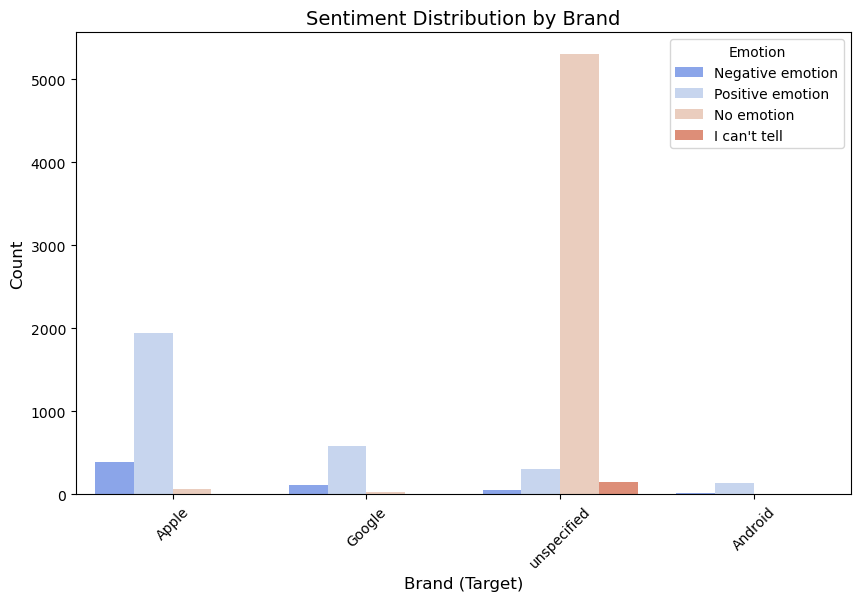

In [13]:
# Create the visualization
plt.figure(figsize=(10, 6))
sns.countplot(data, x="target", hue="emotion", palette="coolwarm")

# Customize labels and title
plt.title("Sentiment Distribution by Brand", fontsize=14)
plt.xlabel("Brand (Target)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Emotion")
plt.xticks(rotation=45)

# Show the plot
plt.show()

C:\Users\karay\AppData\Local\Temp\ipykernel_19892\987691375.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data, x = "emotion", order = data["emotion"].value_counts().index, palette = 'Blues')
C:\Users\karay\AppData\Local\Temp\ipykernel_19892\987691375.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels = ["Not Positive", "Positive"])


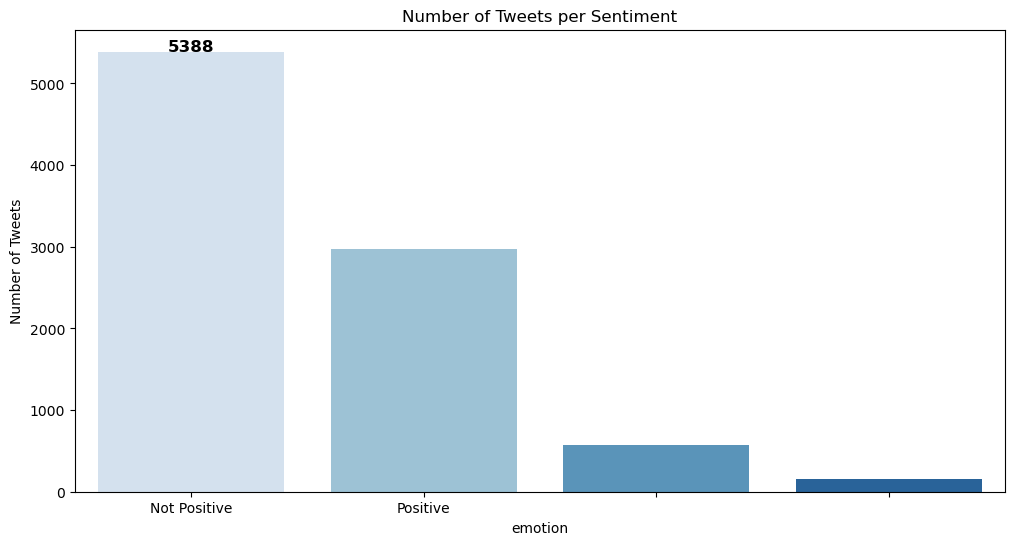

In [14]:
#Visualizing new Sentiment split
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(data = data, x = "emotion", order = data["emotion"].value_counts().index, palette = 'Blues')
ax.set_xticklabels(labels = ["Not Positive", "Positive"])
ax.set_xlabel(xlabel = "emotion")
ax.tick_params(axis='y', which='major')
ax.set_ylabel(ylabel = "Number of Tweets")
ax.set_title(f"Number of Tweets per Sentiment");
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,  # X position (center of the bar)
            p.get_height() + 10,            # Y position (slightly above the bar)
            int(p.get_height()),            # Text (convert height to int for clean display)
            ha='center',                    # Center the text horizontally
            fontsize=12,                     # Font size
            fontweight='bold')    
    plt.show()  

From the analysis we can see that Not positive has a significantly larger count of 5388 tweets compared to Positive emoitions.This data is imbalanced and therefore,we need to focus on a model that addresses the imbalance.

In [ ]:
nltk.download('stopwords')
tokenizer = RegexpTokenizer(r'(?u)\w{3,}')
stopwords_list = stopwords.words('english')
stemmer = PorterStemmer()

def preprocess_text(text):
    # Standardize case (lowercase the text)
    standard_text = text.lower()
    # Tokenize text using `tokenizer`
    tokens = tokenizer.tokenize(standard_text)
    # Remove stopwords using `stopwords_list`
    final_tokens = [word for word in tokens if word not in stopwords_list]
    # Stem the tokenized text using `stemmer`
    stemmed = [stemmer.stem(word) for word in final_tokens]
    # Return the preprocessed text
    return stemmed
preprocess_text("This is an example sentence for preprocessing.")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['exampl', 'sentenc', 'preprocess']

In [16]:
#sample tweet before cleaning
data['text'].iloc[100]

'Headline: &quot;#iPad 2 is the Must-Have Gadget at #SXSW&quot; Hmm... I could have seen that one coming! {link} #gadget'

In [17]:
preprocess_text(data['text'].iloc[100])

['headlin',
 'quot',
 'ipad',
 'must',
 'gadget',
 'sxsw',
 'quot',
 'hmm',
 'could',
 'seen',
 'one',
 'come',
 'link',
 'gadget']

In [18]:
text_data = data.text.apply(lambda x: preprocess_text(x))
text_data

0       [wesley83, iphon, hr, tweet, rise_austin, dead...
1       [jessede, know, fludapp, awesom, ipad, iphon, ...
2              [swonderlin, wait, ipad, also, sale, sxsw]
3       [sxsw, hope, year, festiv, crashi, year, iphon...
4       [sxtxstate, great, stuff, fri, sxsw, marissa, ...
                              ...                        
9088                        [ipad, everywher, sxsw, link]
9089    [wave, buzz, mention, interrupt, regularli, sc...
9090    [googl, zeiger, physician, never, report, pote...
9091    [verizon, iphon, custom, complain, time, fell,...
9092    [ûârt, mention, googl, test, ûïcheck, offer, s...
Name: text, Length: 9092, dtype: object

In [19]:
data["preprocessed_text"] = text_data
data.head()

,text,target,emotion,preprocessed_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Apple,Negative emotion,"[wesley83, iphon, hr, tweet, rise_austin, dead..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Apple,Positive emotion,"[jessede, know, fludapp, awesom, ipad, iphon, ..."
2,@swonderlin Can not wait for #iPad 2 also. The...,Apple,Positive emotion,"[swonderlin, wait, ipad, also, sale, sxsw]"
3,@sxsw I hope this year's festival isn't as cra...,Apple,Negative emotion,"[sxsw, hope, year, festiv, crashi, year, iphon..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,"[sxtxstate, great, stuff, fri, sxsw, marissa, ..."


### Before modeling the data , we have to train-test split to divide the data into training and test sets in order to avoid data leakage

In [20]:

# Subsetting the columns for modeling
df = data[['preprocessed_text', 'emotion']]

# Converting the tokens to a string (if 'text' contains lists of tokens)
df = df.copy()

# If 'text' is a list of tokens, join them; otherwise, ensure it's a string
df["joined_preprocessed_text"] = df['preprocessed_text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))

df.head()


,preprocessed_text,emotion,joined_preprocessed_text
0,"[wesley83, iphon, hr, tweet, rise_austin, dead...",Negative emotion,wesley83 iphon hr tweet rise_austin dead need ...
1,"[jessede, know, fludapp, awesom, ipad, iphon, ...",Positive emotion,jessede know fludapp awesom ipad iphon app lik...
2,"[swonderlin, wait, ipad, also, sale, sxsw]",Positive emotion,swonderlin wait ipad also sale sxsw
3,"[sxsw, hope, year, festiv, crashi, year, iphon...",Negative emotion,sxsw hope year festiv crashi year iphon app sxsw
4,"[sxtxstate, great, stuff, fri, sxsw, marissa, ...",Positive emotion,sxtxstate great stuff fri sxsw marissa mayer g...


In [21]:
#Making the pipeline
pipe = Pipeline([('vectorizer', TfidfVectorizer()),
                 ('model', MultinomialNB())])

In [22]:

# Create train test split
X_train, X_test, y_train, y_test = train_test_split(df["joined_preprocessed_text"], df.emotion, test_size=0.3, random_state=42)

X_train

2710                    wow appl realli thought sxsw link
2358    appl schiller white iphon debut spring also tr...
6194    mention join actsofshar com amp start tonight ...
1367    time alway link code valid 59p infektd sxsw necro
294     makeshift appl store 6th congress kid amaz sxs...
                              ...                        
5735    mention notatsxsw sxsw link free download meet...
5192    mention quot futur local contextu discoveri qu...
5391    mention android may gain market share never kn...
861     mention love mention mention sxsw quot appl co...
7271    anyon know statu ipad austin pop store sold ge...
Name: joined_preprocessed_text, Length: 6364, dtype: object

In [ ]:
#Fitting the model
pipe.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('model', MultinomialNB())])

In [44]:
pipe.score(X_test,y_test)

0.6330645161290323

In [50]:
pipe.set_params(model = RandomForestClassifier())

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('model', RandomForestClassifier())])

In [51]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('model', RandomForestClassifier())])

In [52]:
pipe.score(X_test,y_test)

0.658724340175953

In [53]:
y_pred = pipe.predict(X_test)

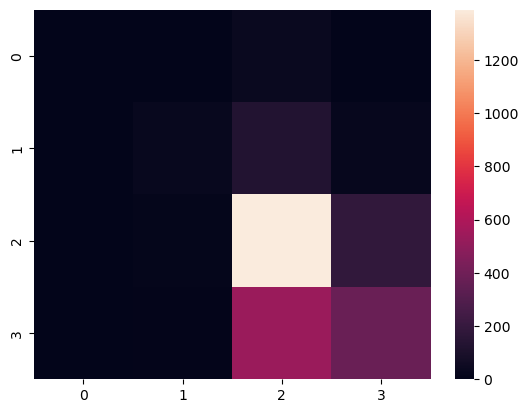

In [59]:
sns.heatmap(confusion_matrix(y_test,y_pred));

In [57]:
print(classification_report(y_test,y_pred))

                  precision    recall  f1-score   support

    I can't tell       0.00      0.00      0.00        41
Negative emotion       0.59      0.16      0.26       182
      No emotion       0.67      0.88      0.76      1585
Positive emotion       0.64      0.41      0.50       920

        accuracy                           0.66      2728
       macro avg       0.47      0.36      0.38      2728
    weighted avg       0.64      0.66      0.63      2728



There is an improvement in the performance of the score of our hyperparameters suggesting that when the model is tuned well,there is a chance for identifying positive emotions in the dataset.